In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [64]:
df = pd.read_csv("ev_vs_petrol_dataset_v3.csv")

df.head()


,country,region,year,vehicle_segment,powertrain_type,ev_sales,petrol_car_sales,diesel_car_sales,total_vehicle_sales,ev_market_share,...,avg_ev_range_km,fuel_price_usd_per_liter,electricity_price_usd_per_kwh,gdp_per_capita,urban_population_percent,co2_emissions_transport_mt,ev_subsidy_usd,emission_regulation_score,ev_growth_rate_yoy,is_ev_dominant
0,Australia,Oceania,2010,commercial,ICE,5,92877,61921,154803,0.00,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
1,Australia,Oceania,2010,mass_market,ICE,57,535933,73089,609079,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
2,Australia,Oceania,2010,premium,ICE,37,235282,20462,255781,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
3,Australia,Oceania,2011,commercial,ICE,11,98092,65395,163498,0.01,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,120.00,0
4,Australia,Oceania,2011,mass_market,ICE,129,569679,77684,647492,0.02,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,126.32,0


In [67]:
print(df.isna())

print(df.isna().sum())


      country  region   year  vehicle_segment  powertrain_type  ev_sales  \
0       False   False  False            False            False     False   
1       False   False  False            False            False     False   
2       False   False  False            False            False     False   
3       False   False  False            False            False     False   
4       False   False  False            False            False     False   
...       ...     ...    ...              ...              ...       ...   
1195    False   False  False            False            False     False   
1196    False   False  False            False            False     False   
1197    False   False  False            False            False     False   
1198    False   False  False            False            False     False   
1199    False   False  False            False            False     False   

      petrol_car_sales  diesel_car_sales  total_vehicle_sales  \
0                False

In [69]:
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [71]:
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1200, 22) 

number of rows:  1200
number of columns:  22


In [73]:
df.dtypes

country                           object
region                            object
year                               int64
vehicle_segment                   object
powertrain_type                   object
ev_sales                           int64
petrol_car_sales                   int64
diesel_car_sales                   int64
total_vehicle_sales                int64
ev_market_share                  float64
charging_stations                  int64
fast_chargers_share              float64
avg_ev_range_km                    int64
fuel_price_usd_per_liter         float64
electricity_price_usd_per_kwh    float64
gdp_per_capita                     int64
urban_population_percent         float64
co2_emissions_transport_mt       float64
ev_subsidy_usd                     int64
emission_regulation_score        float64
ev_growth_rate_yoy               float64
is_ev_dominant                     int64
dtype: object

In [75]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.dtypes

country                                  object
region                                   object
year                             datetime64[ns]
vehicle_segment                          object
powertrain_type                          object
ev_sales                                  int64
petrol_car_sales                          int64
diesel_car_sales                          int64
total_vehicle_sales                       int64
ev_market_share                         float64
charging_stations                         int64
fast_chargers_share                     float64
avg_ev_range_km                           int64
fuel_price_usd_per_liter                float64
electricity_price_usd_per_kwh           float64
gdp_per_capita                            int64
urban_population_percent                float64
co2_emissions_transport_mt              float64
ev_subsidy_usd                            int64
emission_regulation_score               float64
ev_growth_rate_yoy                      

In [77]:
df.describe(include='all')


,country,region,year,vehicle_segment,powertrain_type,ev_sales,petrol_car_sales,diesel_car_sales,total_vehicle_sales,ev_market_share,...,avg_ev_range_km,fuel_price_usd_per_liter,electricity_price_usd_per_kwh,gdp_per_capita,urban_population_percent,co2_emissions_transport_mt,ev_subsidy_usd,emission_regulation_score,ev_growth_rate_yoy,is_ev_dominant
count,1200,1200,1200,1200,1200,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
unique,25,5,NaN,3,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australia,Europe,NaN,commercial,ICE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,672,NaN,400,1164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017-07-02 06:00:00,NaN,NaN,6.360236e+04,7.733063e+05,1.409369e+05,9.778455e+05,6.327992,...,265.872500,1.342239,0.169508,35651.525000,74.609000,190.837000,2910.940000,58.761860,64.002958,0.018333
min,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,5.000000e+00,1.727000e+03,1.500000e+02,1.748000e+04,0.000000,...,106.000000,0.482900,0.066990,1359.000000,30.900000,5.400000,0.000000,19.484000,-40.960000,0.000000
25%,NaN,NaN,2013-10-01 18:00:00,NaN,NaN,2.002500e+02,8.870500e+04,1.951075e+04,1.300465e+05,0.077500,...,150.000000,1.097000,0.098750,11077.250000,64.175000,30.175000,0.000000,43.600000,16.372500,0.000000
50%,NaN,NaN,2017-07-02 12:00:00,NaN,NaN,2.731500e+03,2.294785e+05,5.136100e+04,2.905130e+05,0.830000,...,238.500000,1.352000,0.158000,37329.000000,79.900000,94.250000,2794.500000,59.350000,44.165000,0.000000
75%,NaN,NaN,2021-04-02 06:00:00,NaN,NaN,1.990500e+04,6.385320e+05,1.111910e+05,7.624482e+05,5.832500,...,380.250000,1.568500,0.220250,50930.000000,84.075000,159.575000,4973.750000,74.825000,80.907500,0.000000
max,NaN,NaN,2025-01-01 00:00:00,NaN,NaN,7.670056e+06,1.477369e+07,2.014595e+06,1.884998e+07,95.000000,...,507.000000,2.153000,0.379040,103437.000000,98.500000,1900.800000,8952.000000,95.602000,300.000000,1.000000


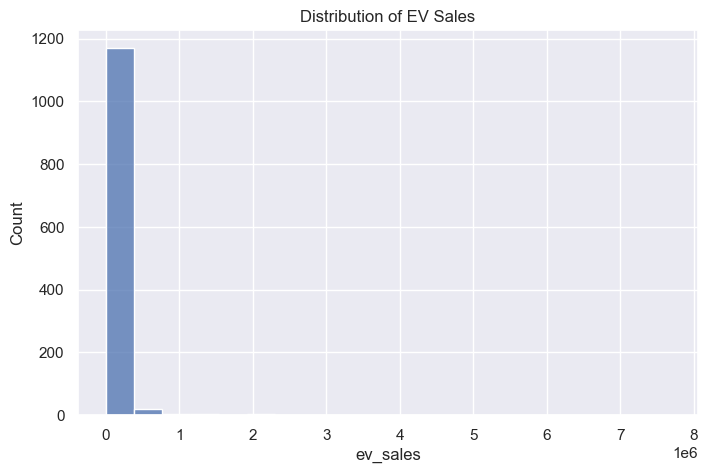

In [79]:
plt.figure(figsize=(8,5))
sns.histplot(df['ev_sales'], bins=20)
plt.title("Distribution of EV Sales")
plt.show()


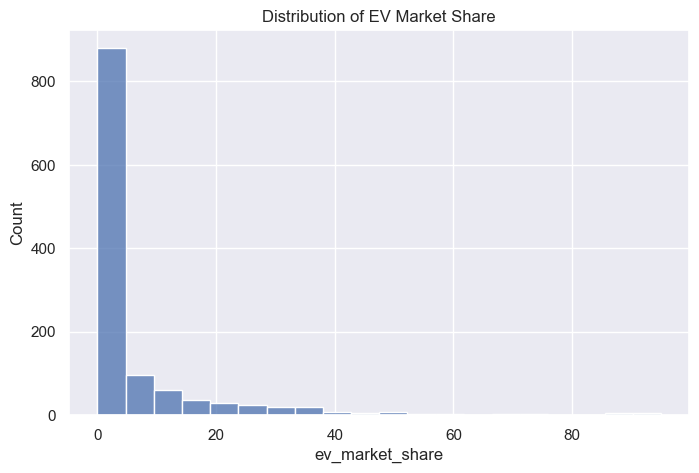

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df['ev_market_share'], bins=20)
plt.title("Distribution of EV Market Share")
plt.show()

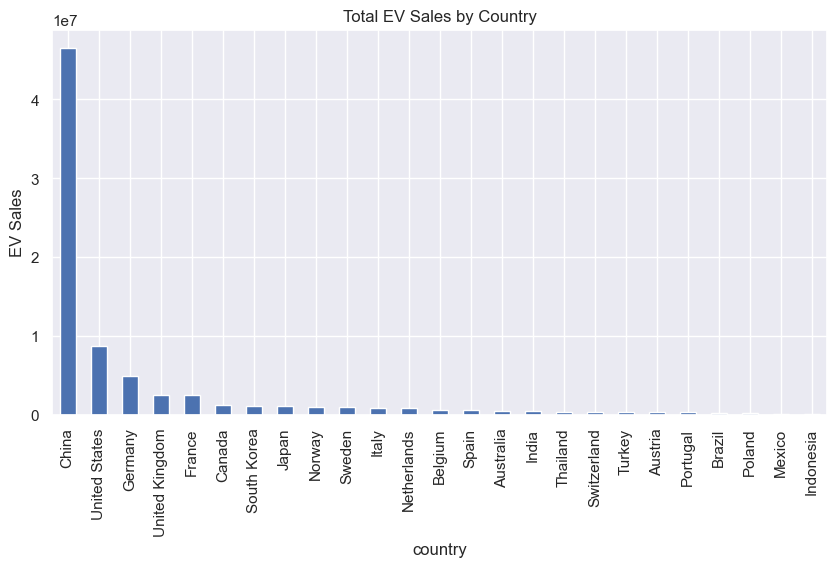

country
China             46544667
United States      8705699
Germany            4848735
United Kingdom     2450901
France             2446101
Canada             1166676
South Korea        1140878
Japan              1087957
Norway              923061
Sweden              908473
Italy               856622
Netherlands         820328
Belgium             618647
Spain               527789
Australia           507897
India               470701
Thailand            361898
Switzerland         358938
Turkey              324746
Austria             315708
Portugal            262024
Brazil              254703
Poland              184107
Mexico              132167
Indonesia           103414
Name: ev_sales, dtype: int64

In [83]:
country_ev_sales = df.groupby('country')['ev_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_ev_sales.plot(kind='bar')
plt.title("Total EV Sales by Country")
plt.ylabel("EV Sales")
plt.show()

country_ev_sales


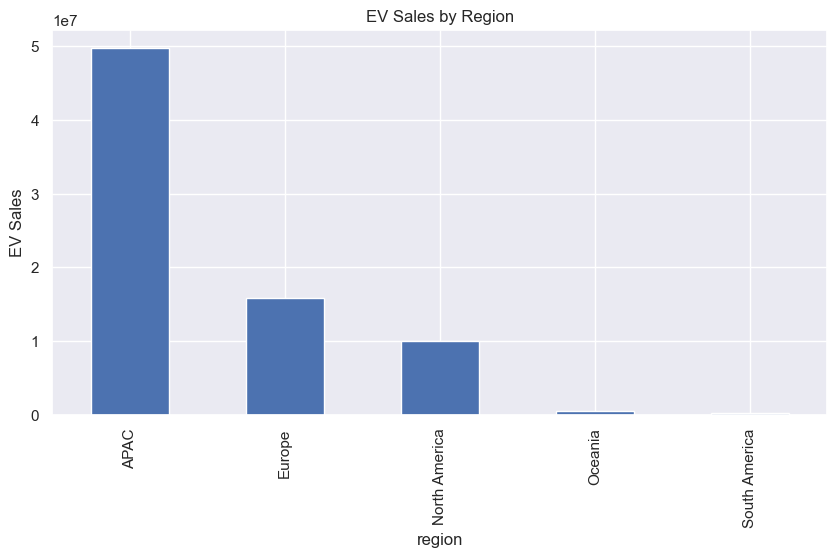

region
APAC             49709515
Europe           15846180
North America    10004542
Oceania            507897
South America      254703
Name: ev_sales, dtype: int64

In [85]:
region_ev_sales = df.groupby('region')['ev_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
region_ev_sales.plot(kind='bar')
plt.title("EV Sales by Region")
plt.ylabel("EV Sales")
plt.show()

region_ev_sales


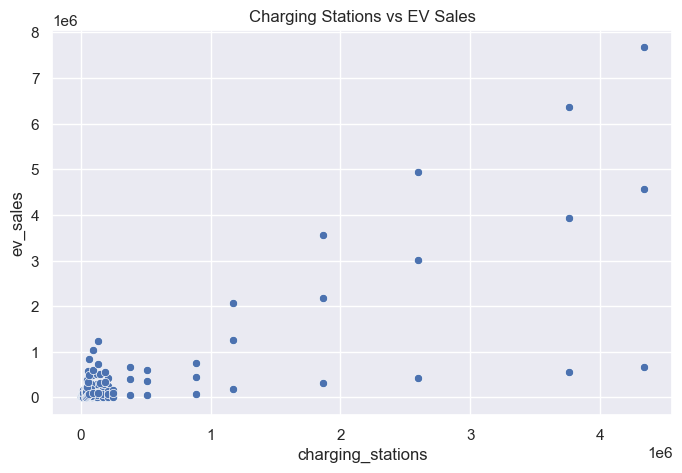

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='charging_stations', y='ev_sales', data=df)
plt.title("Charging Stations vs EV Sales")
plt.show()


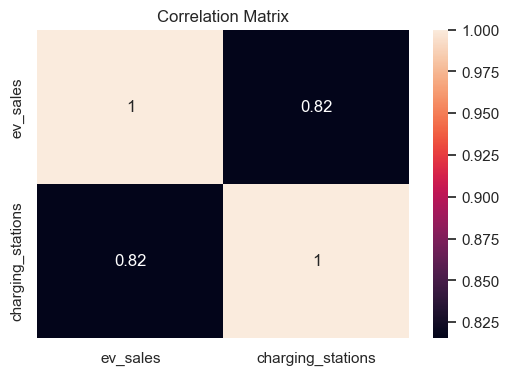

In [89]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['ev_sales', 'charging_stations']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


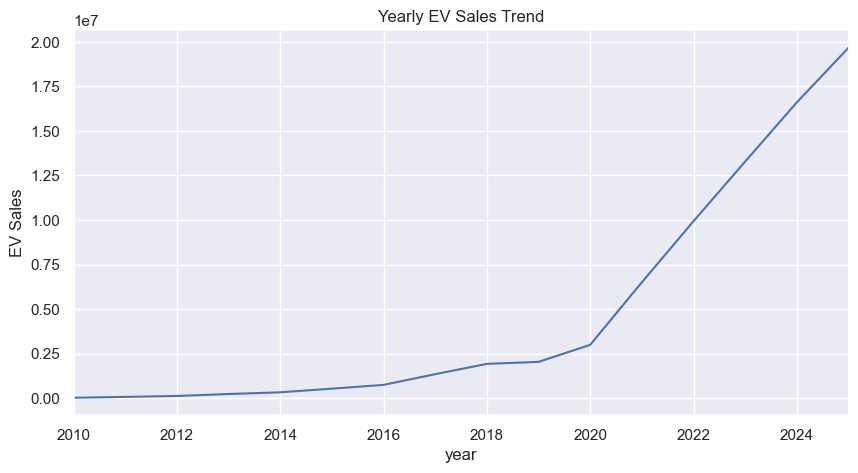

In [91]:
yearly_ev_sales = df.groupby('year')['ev_sales'].sum()

plt.figure(figsize=(10,5))
yearly_ev_sales.plot()
plt.title("Yearly EV Sales Trend")
plt.ylabel("EV Sales")
plt.show()
